<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/data_subset_Nazneen_processed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [24]:
raw_df = pd.read_csv("combined_dataset.csv", sep=",")

In [25]:
raw_df.head(10)

,site,role,company_name,location,job_description,salary_range,ratings,job_level,Search_Keywords,Search_Location,Job_Detail_Link,Post_Time,Current_Time,job_type
0,glassdoor,Senior Advisor Crime Data & Analysis,Metropolitan Police Department3.4 ★,"Washington, DC",There is only one city in the country that can...,$127K - $178K (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,glassdoor,Data Analyst – Data Entry,Juristat,Remote,Juristat is building an innovative suite of pr...,$30K - $35K (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,glassdoor,Business Systems Analyst,Distributed Solar Development4.1 ★,"New York, NY",Join AZAD Technology Partners as a Business Sy...,$130K - $160K (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,glassdoor,Data Analyst,Haberfeld4.5 ★,"Lincoln, NE","Who We Are:\nAt Haberfeld we align marketing, ...",$54K - $82K (Glassdoor est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,glassdoor,Senior Advisor Crime Data & Analysis,LeewayHertz4.1 ★,"San Francisco, CA",There is only one city in the country that can...,$58K - $88K (Glassdoor est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,glassdoor,Data Analyst,Haberfeld4.5 ★,"Lincoln, NE","Who We Are:\nAt Haberfeld we align marketing, ...",$54K - $82K (Glassdoor est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,glassdoor,Data Analysis (Charlotte Corporate Location),Genpak LLC3.2 ★,"Charlotte, NC","Data Analyst\nCollect customer requirements, d...",$52K - $81K (Glassdoor est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,glassdoor,Data Science Graduate,Hewlett Packard Enterprise4.1 ★,"Spring, TX",Data Science Graduate\n\nThis role has been de...,$57K - $131K (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,glassdoor,Junior Data Analyst,"MANSCAPED, Inc4.6 ★",Remote,Who We Are - MANSCAPED® is a leading men’s gro...,$24.00 - $28.00 Per Hour (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,glassdoor,Business Analyst,Boston Technology4.6 ★,"Columbus, OH",We are looking for someone who understands the...,$35.95 - $45.70 Per Hour (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
n_rows, n_cols = raw_df.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns.")

The DataFrame has 47334 rows and 14 columns.


In [27]:
raw_df['job_description'][1]

"Juristat is building an innovative suite of products, and we need the team to create those tools. We’re seeking a highly motivated and organized individual to join our data team as a Data Analyst. This team is responsible for acquiring and analyzing the most complete and accurate data available to grow our products and inform our business strategies.\nThis particular team member will be responsible for analyzing incoming legal documents in real-time to detect and correct errors in our processing, enter data from the source documents into templates, annotate legal documents, and provide feedback to others, to improve our proprietary artificial intelligence.\nThis role is 100% remote work-from-home. If you possess high attention to detail and a strong work ethic – this is the job for you!\n\nABOUT THE POSITION\nYour responsibilities will include:\nCollecting and analyzing digital documents and related data\nReviewing data and documents for errors\nEntering, correcting, and formatting da

In [28]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47334 entries, 0 to 47333
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   site             47334 non-null  object
 1   role             47334 non-null  object
 2   company_name     47207 non-null  object
 3   location         46686 non-null  object
 4   job_description  45609 non-null  object
 5   salary_range     29691 non-null  object
 6   ratings          4701 non-null   object
 7   job_level        19171 non-null  object
 8   Search_Keywords  1575 non-null   object
 9   Search_Location  1575 non-null   object
 10  Job_Detail_Link  1575 non-null   object
 11  Post_Time        1575 non-null   object
 12  Current_Time     1575 non-null   object
 13  job_type         7804 non-null   object
dtypes: object(14)
memory usage: 5.1+ MB


In [29]:
null_counts = raw_df.isnull().sum().sort_values(ascending=False)
null_df = pd.DataFrame(null_counts, columns=['Null Count'])
null_df

,Null Count
Search_Keywords,45759
Search_Location,45759
Job_Detail_Link,45759
Post_Time,45759
Current_Time,45759
ratings,42633
job_type,39530
job_level,28163
salary_range,17643
job_description,1725


In [30]:
raw_df[raw_df['company_name'].isnull()]



,site,role,company_name,location,job_description,salary_range,ratings,job_level,Search_Keywords,Search_Location,Job_Detail_Link,Post_Time,Current_Time,job_type
632,glassdoor,Data Scientist,NaN,"Pasadena, CA",The Data Scientist is responsible for developi...,$72K - $132K (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,glassdoor,Web Automator (Remote),NaN,Bengaluru,Job Position - Part-time (Regular)\nRate - 4-6...,₹332.00 - ₹498.00 Per hour (Employer Est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,glassdoor,Data Creation Specialist,NaN,Bengaluru,Overview:\nWe are seeking a highly organized a...,₹4L - ₹6L (Employer Est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1222,glassdoor,Power BI Developer,NaN,India,We are seeking a highly skilled and experience...,Easy Apply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1235,glassdoor,DATA SCIENCE,NaN,Bengaluru,Recruitment Company Name\nDEzen Technology Sol...,₹10L (Employer Est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19133,glassdoor,Data Scientist,NaN,"Pasadena, CA",The Data Scientist is responsible for developi...,$72K - $132K (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19679,glassdoor,Data Scientist,NaN,"Pasadena, CA",The Data Scientist is responsible for developi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22191,glassdoor,Data Scientist,NaN,"Pasadena, CA",The Data Scientist is responsible for developi...,$72K - $132K (Employer est.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25101,indeed,Data Scientist,NaN,"Pasadena, CA",NaN,NaN,NaN,NaN,data scientist,United States,https://www.indeed.com/rc/clk?jk=ab50cfa59689a...,Posted\nPosted 28 days ago •Many applications ...,2023-11-14,NaN


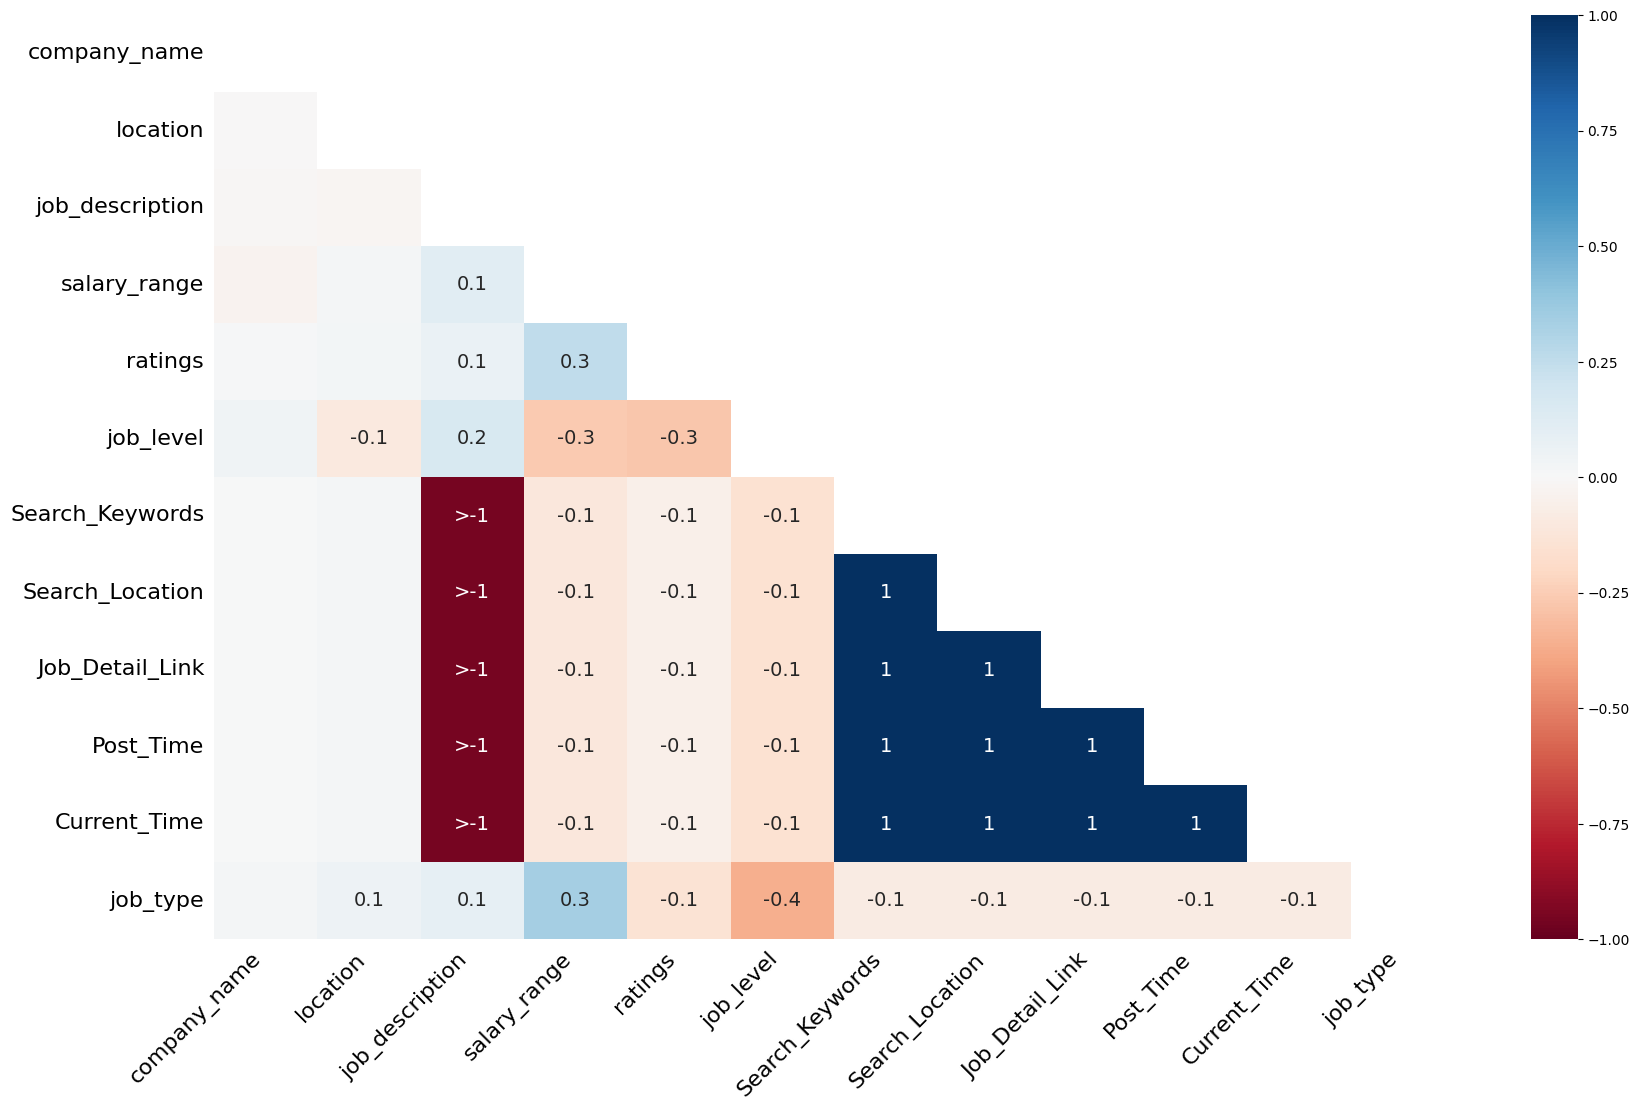

In [33]:
# Visualize the correlation of missing values
msno.heatmap(raw_df)

plt.show()
